<font size = "6">
<b>Support Vector Machine</b>
</font>

Table of Contents
<div id="toc"></div>

# 1. Classification (Linear)

- Figure out, autonomously, which category (or class) an unknown item should be categorized into

- Number of categories / classes

    - Binary: 2 different classes
    
    - Multiclass : more than 2 classes
    
- Feature

    - The measurable parts that make up the unknown item (or the information you have available to categorize)

# 2. Illustrative Example

- <font color='green'>Binary classification</font>
    - $C_1$ and $C_2$
    
- Features
    - The coordinate of the unknown animal $i$ in the zoo
    
$$x = \begin{bmatrix}x_1 \\ x_2 \end{bmatrix}$$

<br>
<img src="./image_files/SVM001.jpg", width = 350>
<br>

- Is it possible to distinguish betwwen $C_1$ and $C_2$ by its coordinates on a map of the zoo?

- We need to find a separating hyperplane (or a line in 2D)

$$ \omega_1x_1 + \omega_2x_2 + \omega_0 = 0 $$

$$ \begin{bmatrix}\omega_1 & \omega_2 \end{bmatrix}
\begin{bmatrix}x_1 \\ x_2 \end{bmatrix} + \omega_0 = 0$$

$$ \omega^Tx + \omega_0 = 0$$


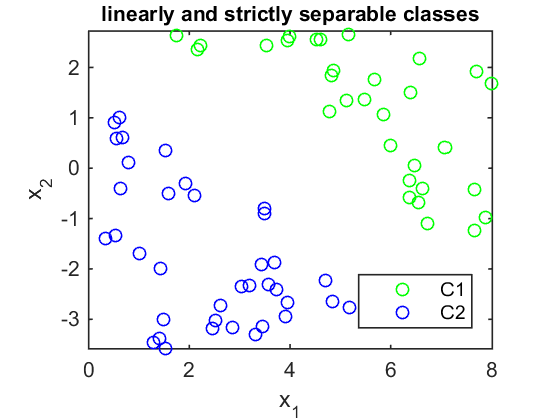

In [1]:
%% Make the blue and red and Labels
% *For linearly and strictly separable sets*

rand('state',47)
x1 = 8*rand(1,100);         % uniform dist for x1
x2 = 7*rand(1,100) - 4;     % uniform dist for x2

g0 = .8*x1 + x2 - 3;        % user defines the decision boundary
                            % w = [0.8 1]', w0 = -3

C1 = find(g0 >= 1);         % labels for blue 
C2 = find(g0 < -1);         % labels for red

figure(1),  clf
plot(x1(C1),x2(C1),'go',x1(C2),x2(C2),'bo');
axis equal, xlim([0 8])
title('linearly and strictly separable classes','fontweight','bold','fontsize',10)
xlabel('x_1'),   ylabel('x_2')
legend('C1','C2','location','SE')


- Given:
    - Hyperplane defined by $\omega$ and $\omega_0$
    - Animals coordinates (or features) $x$
    

- Decision making:

$$ \omega^Tx + \omega_0 >0 \implies x \; \text{belongs to} \; C_1$$

$$ \omega^Tx + \omega_0 <0 \implies x \; \text{belongs to} \; C_2$$



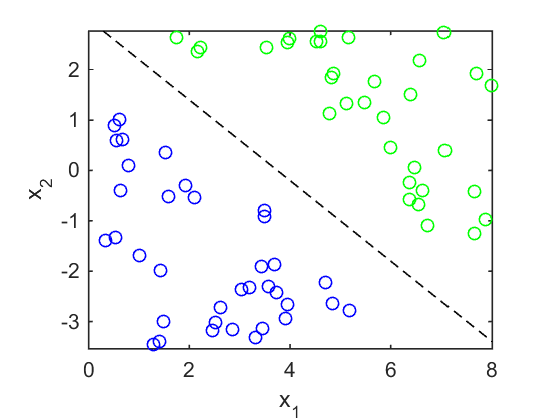

In [2]:
%% Plot the blue and the red
%  see how data are generated

xp = 0:.01:8;               % just for plotting lines
yp = -.8*xp + 3;

figure(2),  clf
plot(x1(C1),x2(C1),'go',x1(C2),x2(C2),'bo',xp,yp,'--k');

axis equal, xlim([0 8])
xlabel('x_1'),   ylabel('x_2')


- Find $\omega$ and $\omega_0$ such that $x$ given $\omega^Tx + \omega_0 = 0$

    or


- Find $\omega$ and $\omega_0$ such that $x\in C_1$ given $\omega^Tx + \omega_0 >1$ and $x\in C_2$ given $\omega^Tx + \omega_0 < -1$


- Same problem if strictly separable

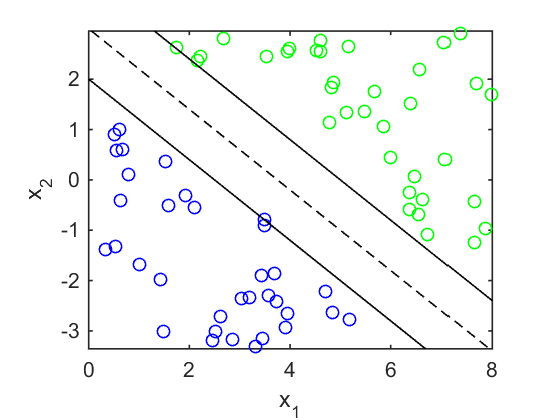

In [3]:
%% Plot the blue and the red
%  see how data are generated

xp = 0:.01:8;        %% just for plotting lines

yp = -.8*xp + 3;
y1 = yp - 1;
y2 = yp + 1;

figure(3),  clf
plot(x1(C1),x2(C1),'go',x1(C2),x2(C2),'bo',...
     xp,yp,'--k',...
     xp,y1,'-k',...
     xp,y2,'-k'); 

axis equal, xlim([0 8])
xlabel('x_1'),   ylabel('x_2')

## LP Formulation 1  
- $n \;(=2)$ features

- $m = N + M$ data points in training set

$$ x^i = \begin{bmatrix} x^i_1 \\ x^i_2 \end{bmatrix}$$

- $N$ belongs to $C_1$ in training set

- $M$ belongs to $C_2$ in training set

- $\omega$ and $\omega_0$ are the variables (unknown)

<br>
$$\begin{align*} \text{minimize} \quad
& \text{something} \\ \\
\text{subject to} \quad
& \begin{cases}
\omega^Tx^1 + \omega_0 \geq1\\
\omega^Tx^2 + \omega_0 \geq1\\
 \quad  \quad \vdots \\
\omega^Tx^N + \omega_0 \geq1\\
\end{cases} \\
& \begin{cases}
\omega^Tx^{N+1} + \omega_0 \leq{-1}\\
\omega^Tx^{N+2} + \omega_0 \leq{-1}\\
 \quad  \quad \vdots \\
\omega^Tx^{N+M} + \omega_0 \leq{-1}\\
\end{cases} \end{align*}$$

## Code (CVX)

$$
\begin{align*} &X_1 = \begin{bmatrix} x_1^1 & x_1^2 & \cdots & x_1^N \\ 
x_2^1 & x_2^2 & \cdots & x_2^N \\ 
\end{bmatrix}\\
&X_2 = \begin{bmatrix} x_1^{N +1} & x_1^{N +2} & \cdots & x_1^{N +M} \\ 
x_2^{N +1} & x_2^{N +2} & \cdots & x_2^{N +M} \\ 
\end{bmatrix}\end{align*}$$

<br>

$$\begin{align*} \text{minimize} \quad
& \text{something} \\
\text{subject to} \quad 
& X_1^T\omega + \omega_0 \geq 1 \\
& X_2^T\omega + \omega_0 \leq -1
\end{align*}$$

```octave
cvx_begin quiet 
    variables w(n,1) w0 
    X1'*w + w0 >= 1; 
    X2'*w + w0 <= -1; 
cvx_end
```

In [4]:
%% CVX using simple classification

n = 2;
X1 = [x1(C1);
      x2(C1)];

X2 = [x1(C2);
      x2(C2)];

%%
% no ojective func => feasible solutions
cvx_begin quiet
    variables w(n,1) w0    
    
    X1'*w + w0 >= 1;
    X2'*w + w0 <= -1;
cvx_end

w
w0

% normalize 
w/w(2)
w0/w(2)

w =

   15.1120
   18.0136


w0 =

  -56.1396


ans =

    0.8389
    1.0000


ans =

   -3.1165

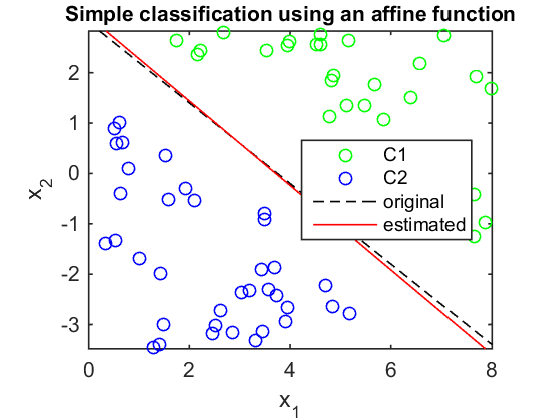

In [5]:
%% plot

xp = 0:.01:8;           % just for plotting lines

yp = -.8*xp + 3;
yhat = -w(1)/w(2)*xp - w0/w(2);

figure(4),  clf
plot(X1(1,:),X1(2,:),'go',...
     X2(1,:), X2(2,:),'bo',...
     xp,yp,'k--',...    
     xp,yhat,'-r'); 
 
axis equal, xlim([0 8])
xlabel('x_1'),   ylabel('x_2')
title('Simple classification using an affine function','fontweight','bold','fontsize',10);
legend('C1','C2','original','estimated','location','East')

## Outlier

- Note that in the real world, you may have noise, errors, or outliers that do not accurately represent the actual phenomena


- Non-separable case


- No solutions (hyperplane) exist
    - We will allow some training examples to be misclassified !
    - but we want their number to be minimized

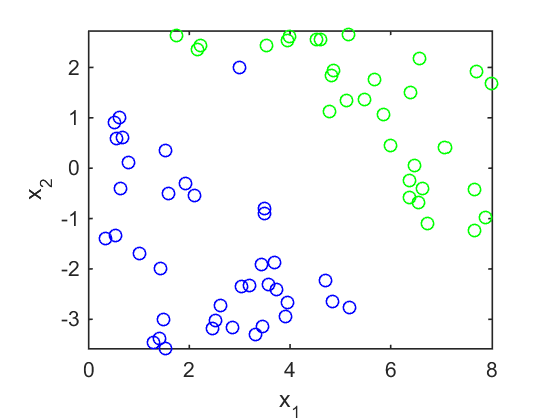

w =

   NaN
   NaN


w0 =

   NaN

In [9]:
%% Add Outlier to motivate and go further 

% outlier = [2;2];
outlier = [3;2];        % solution does not exist
X2new = [X2 outlier];

clear w
cvx_begin quiet
    variables w(n,1) w0       
    X1'*w + w0 >= 1;
    X2new'*w + w0 <= -1;
cvx_end

w
w0

figure(5),  clf
plot(X1(1,:),X1(2,:),'go',...
     X2new(1,:),X2new(2,:),'bo');

axis equal, xlim([0 8])
xlabel('x_1'),   ylabel('x_2')

## LP Formulation 2

- $n \;(=2)$ features

- $m = N+M$ data points in a training set

$$x^i = \begin{bmatrix} x_1^i \\ x_2^i \end{bmatrix}$$

- $N$ belongs to $C_1$ in training set

- $M$ belongs to $C_2$ in training set

- $\omega$ and $\omega_0$ are the variables (unknown)

- For the non-separable case, we relex the above constraints

- <font color='red'>Need slack variables $u$ and $\upsilon$ where all are positive</font>


__The optimization problem for the non-separable case__

$$\begin{align*} \text{minimize} \quad & \sum\limits_{i=1}^{N}u_i + \sum\limits_{i=1}^{M}\upsilon_i \\ \\
\text{subject to} \quad
& \begin{cases}
\omega^Tx^1 + \omega_0 \geq1-u_1\\
\omega^Tx^2 + \omega_0 \geq1-u_2\\
 \quad  \quad \vdots \\
\omega^Tx^N + \omega_0 \geq1-u_N\\
\end{cases} \\
& \begin{cases}
\omega^Tx^{N+1} + \omega_0 \leq{-(1-\upsilon_1)}\\
\omega^Tx^{N+2} + \omega_0 \leq{-(1-\upsilon_2)}\\
 \quad  \quad \vdots \\
\omega^Tx^{N+M} + \omega_0 \leq{-(1-\upsilon_M)}\\
\end{cases} \\
& \begin{cases}
u \geq 0\\
v \geq 0\\
\end{cases}
\end{align*}$$


- Expressed in a matrix form


$$\begin{align*} \text{minimize} \quad  & 1^Tu + 1^T\upsilon \\
\text{subject to} \quad
& X_1^T\omega + \omega_0 \geq 1-u \\
& X_2^T\omega + \omega_0 \leq -(1-\upsilon) \\
& u \geq 0 \\
& \upsilon \geq 0
\end{align*}$$
<br><br>
$$\begin{align*} & X_1 = \begin{bmatrix} x_1^1 & x_1^2 & \cdots & x_1^N \\ 
x_2^1 & x_2^2 & \cdots & x_2^N \\ 
\end{bmatrix} \\
& X_2 = \begin{bmatrix} x_1^{N +1} & x_1^{N +2} & \cdots & x_1^{N +M} \\ 
x_2^{N +1} & x_2^{N +2} & \cdots & x_2^{N +M} \\ 
\end{bmatrix} \end{align*}$$ 

$$u = \begin{bmatrix} 
u_1\\
\vdots\\
u_N\\
\end{bmatrix}$$

$$\upsilon = \begin{bmatrix} 
\upsilon_{N+1}\\
\vdots\\
\upsilon_{N+M}\\
\end{bmatrix}$$

## Code (CVX)

```octave
cvx_begin quiet
    variables w(n) w0 u(N) v(M)    
    minimize (ones(1,N)*u + ones(1,M)*v)    
    subject to   
        X1'*w + w0 >= 1 - u;        
        X2'*w + w0 <= -(1 - v);        
        u >= 0;        
        v >= 0;        
cvx_end
```

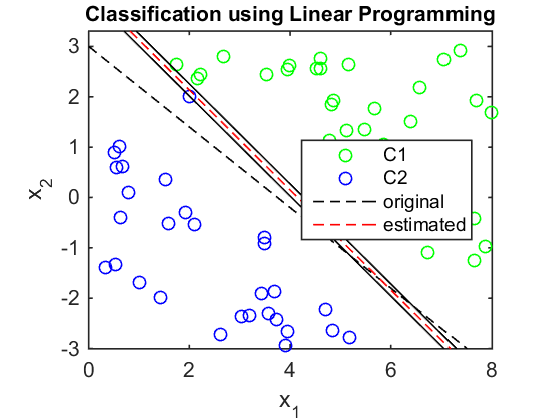

In [10]:
%% CVX linear programming

% outlier = [3;2];        % no solution existed when using simple classification        
outlier = [2;2];          % decision boundary may not accurately represent the actual phenomena

X2new = [X2 outlier];

N = length(X1);
M = length(X2new);

cvx_begin quiet    
    variables w(n) w0 u(N) v(M)
    minimize (ones(1,N)*u + ones(1,M)*v)
    subject to
        X1'*w + w0 >= 1 - u;
        X2new'*w + w0 <= -(1 - v);
        u >= 0;
        v >= 0; 
cvx_end

yhat = -w(1)/w(2)*xp - w0/w(2);
p1 = yhat + 1/w(2);
p2 = yhat - 1/w(2);

figure(5)
plot(X1(1,:),X1(2,:),'go',...
     X2new(1,:),X2new(2,:),'bo',...
     xp,yp,'k--',...
     xp,yhat,'r--',...
     xp,p1,'k',...
     xp,p2,'k');

axis equal, xlim([0 8])

xlabel('x_1'),   ylabel('x_2')
title('Classification using Linear Programming','fontweight','bold','fontsize',10);
legend('C1','C2','original','estimated','location','East')

## Result 2 and further improvement

- Notice that red hyperplane is not as accurately represent the division due to the outlier


- Can we do better when there are noise data or outliers?


- Yes, but we need to look beyond LP


- Idea: large margin leads to good generalization on the test data

## Maximize Margin (Finally, it is Support Vector Machine)

- Distance (= margin)

$$\text{margin} = \frac{2}{\lVert \omega \rVert _2}$$


- Minimize $\lVert \omega \rVert_2$ to maximize the margin


- Multiple objectives


- Use gamma ($\gamma$) as a weighting betwwen the followings:
    - Bigger margin given robustness to outliers
    - Hyperplane that has few (or no) errors


$$\begin{align*} \text{minimize} \quad 
& \lVert \omega \rVert_2 + \gamma(1^Tu + 1^T\upsilon) \\
\text{subject to} \quad
& X_1^T\omega + \omega_0 \geq 1-u \\
& X_2^T\omega + \omega_0 \leq -(1-\upsilon) \\
& u \geq 0 \\
& \nu \geq 0
\end{align*}$$


```octave
cvx_begin quiet 
    variables w(n) w0 u(N) v(M)    
    minimize (norm(w,2) + g*(ones(1,N)*u + ones(1,M)*v))     
    subject to        
        X1'*w + w0 >= 1 - u;         
        X2'*w + w0 <= -(1 - v);        
        u >= 0;         
        v >= 0; 
cvx_end
```

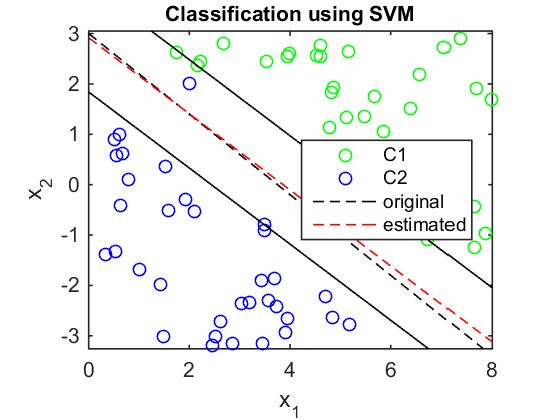

In [11]:
%% CVX Support Vector Machine

outlier = [2;2];
% outlier = [3;2];        
% outlier = [6;1];
% outlier = [];

% g = 0.1;
g = 1;
% g = 10;

X2new = [X2 outlier];

N = length(X1);
M = length(X2new);

cvx_begin quiet    
    variables w(n) w0 u(N) v(M)
    minimize (norm(w,2) + g*(ones(1,N)*u + ones(1,M)*v))
    subject to 
        X1'*w + w0 >= 1 - u;
        X2new'*w + w0 <= -(1 - v);
        u >= 0;
        v >= 0; 
cvx_end

yhat = -w(1)/w(2)*xp - w0/w(2);
p1 = yhat + 1/w(2);
p2 = yhat - 1/w(2);

figure(6)
plot(X1(1,:),X1(2,:),'go',...
     X2new(1,:),X2new(2,:),'bo',...
     xp,yp,'k--',...
     xp,yhat,'r--',...
     xp,p1,'k',...
     xp,p2,'k');

axis equal, xlim([0 8])

xlabel('x_1'),   ylabel('x_2')
title('Classification using SVM','fontweight','bold','fontsize',10);
legend('C1','C2','original','estimated','location','East')

# 3. Support Vector Machine

- Probably the most popular/influential classification algorithm


- A hyperplane based classifier (like the Perceptron)


- Additionally uses the maximum margin principle
    - maximize distance (margin) of closest samples from the decision line
    <br><br>
    $$ \text{maximize {minimum distance}} $$
    <br>
    - note: perceptron only utilizes a sign of distance
    - Finds the hyperplane with maximum separation margin on the training data


$$\begin{align*} \text{minimize} \quad 
& \lVert \omega \rVert_2 + \gamma(1^Tu + 1^T\upsilon) \\
\text{subject to} \quad
& X_1^T\omega + \omega_0 \geq 1-u \\
& X_2^T\omega + \omega_0 \leq -(1-\upsilon) \\
& u \geq 0 \\
& \nu \geq 0
\end{align*}$$


<br><br>
- In a more compact form
<table style="border-style: hidden; border-collapse: collapse;" width = "60%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 20% style="border-style: hidden; border-collapse: collapse;">
             $$\begin{align*}\omega^T x_n + \omega_0 &\geq 1 \;\text{for }\; y_n = +1\\
                \omega^T x_n + \omega_0 &\leq -1 \;\text{for }\; y_n = -1 \end{align*}$$
        </td>
        <td width = 20% style="border-style: hidden; border-collapse: collapse;">
             $$ \Longleftrightarrow $$
        </td>
        <td width = 20%>
            $$y_n\left( \omega^T x_n + \omega_0 \right) \geq 1$$
        </td>
    </tr>
</table>


$$\begin{align*} \text{minimize} \quad 
& \lVert \omega \rVert_2 + \gamma(1^T \xi) \\
\text{subject to} \quad
& y_n\left( \omega^T x_n + \omega_0 \right) \geq 1 - \xi_n \\
& \xi \geq 0 \\
\end{align*}$$



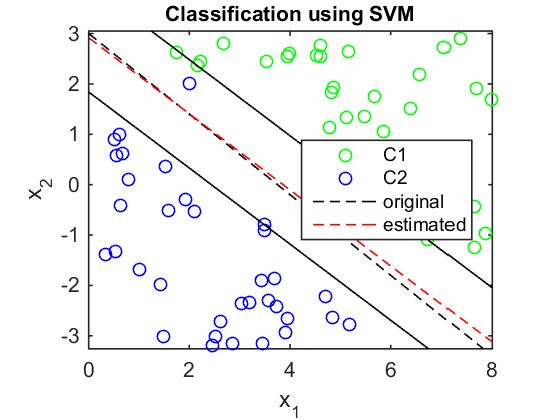

In [12]:
%%
outlier = [2;2];
X2new = [X2 outlier];

N = length(X1);
M = length(X2new);

m = N + M;

x = [X1 X2new];              % fat matrix
y = [ones(1,N) -ones(1,M)];  % row vector

%% CVX Support Vector Machine

cvx_begin quiet    
    variables w(n,1) w0 d(m,1)    
    minimize (norm(w,2) + g*(ones(1,m)*d))
    subject to 
        y'.*(x'*w + w0) >= 1 - d;       
        d >= 0;        
cvx_end

%%
yhat = -w(1)/w(2)*xp - w0/w(2);
p1 = yhat + 1/w(2);
p2 = yhat - 1/w(2);

figure(6)
plot(X1(1,:),X1(2,:),'go',...
     X2new(1,:),X2new(2,:),'bo',...
     xp,yp,'k--',...
     xp,yhat,'r--',...
     xp,p1,'k',...
     xp,p2,'k');

axis equal, xlim([0 8])

xlabel('x_1'),   ylabel('x_2')
title('Classification using SVM','fontweight','bold','fontsize',10);
legend('C1','C2','original','estimated','location','East')

# MATLAB Function

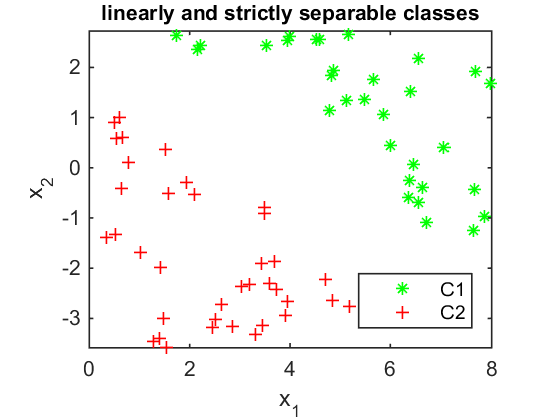

In [22]:
%% Make the blue and red and Labels
% *For linearly and strictly separable sets*

rand('state',47)
x1 = 8*rand(1,100);         % uniform dist for x1
x2 = 7*rand(1,100) - 4;     % uniform dist for x2

g0 = .8*x1 + x2 - 3;        % user defines the decision boundary
                            % w = [0.8 1]', w0 = -3

C1 = find(g0 >= 1);         % labels for blue 
C2 = find(g0 < -1);         % labels for red

figure(1),  clf
plot(x1(C1),x2(C1),'g*',x1(C2),x2(C2),'r+');
axis equal, xlim([0 8])
title('linearly and strictly separable classes','fontweight','bold','fontsize',10)
xlabel('x_1'),   ylabel('x_2')
legend('C1','C2','location','SE')

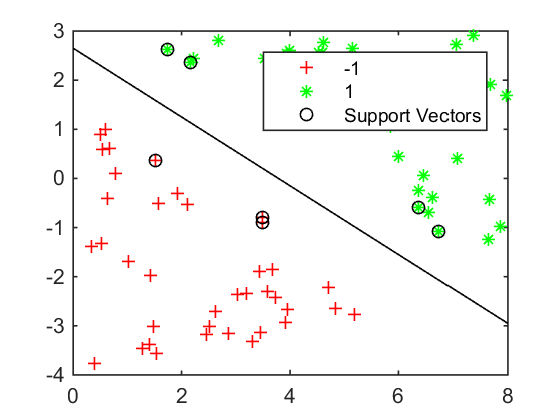

SVMModel = 

          SupportVectors: [7x2 double]
                   Alpha: [7x1 double]
                    Bias: 0.1966
          KernelFunction: @linear_kernel
      KernelFunctionArgs: {}
              GroupNames: [73x1 double]
    SupportVectorIndices: [7x1 double]
               ScaleData: [1x1 struct]
           FigureHandles: {[1x1 Axes]  [1x2 Line]  [1x1 Line]}

In [21]:
X = [x1(C1)', x2(C1)';
    x1(C2)', x2(C2)'];
Y = [ones(1,length(C1)), -ones(1,length(C2))]';

SVMModel = svmtrain(X, Y, 'ShowPlot', true);

### Minimum error classification as mixed integer programming (Optional)

From http://www.cs.cmu.edu/~zkolter/course/15-780-s14/ps2.pdf


In class,
we mentioned that we cannot efficiently find a linear classifier that minimizes 0/1 loss. That is, we cannot easily solve the optimization problem

$$ \min_{\theta} \; \sum_{i=1}^{m} 1 \{y_i\cdot h_{\theta}(x_i) < 0 \}$$

with optimization variables $\theta$, input data $(x_i, y_i)$, $i = 1, \cdots, m$ and where 1 denotes the indicator function (one if the argment is true and zero otherwise).

Show that we can, however, solve this problem as a binary mixed integer program. That is, write an optimization problem over the variables $\theta$ and $z$ with whatever (convex) objective and constraints you want, plus the additional constraint that $z_i \in \{0, 1\}$, such that the solution of this optimization problem gives the $\theta$ the minimizes 0/1 loss.


# 4. Nonlinear Support Vector Machine 

## Kernel
- Often we want to capture nonlinear patterns in the data
    - nonlinear regression: input and output relationship may not be linear
    - nonlinear classification: classes may note be separable by a linear boundary


- Linear models (e.g. linear regression, linear SVM) are note just rich enough


- Kernels: make linear model work in nonlinear settings
    - by mapping data to higher dimensions where it exhibits linear patterns
    - apply the linear model in the new input feature space
    - mapping $=$ changing the feature representation


- Note: such mappings can be expensive to compute in general
    - Kernels give such mappings for (almost) free
    - in most cases, the mappings need not be even computed
    - using the Kernel trick !


## Classifying non-linear separable data
- Consider the binary classification problem
    - each example represented by a single feature $x$
    - No linear separator exists for this data

<img src="./image_files/nonlinear_1D.png", width = 300>

- Now map each example as $x \rightarrow \{x,x^2\}$


- Data now becomes linearly separable in the new representation

<img src="./image_files/linear_2D.png", width = 300>

- Linear in the new representation $=$ nonlinear in the old representation

- Let's look at another example
    - Each example defined by a two features $x=\{x_1, x_2\}$
    - No linear separator exists for this data

<img src="./image_files/nonlinear_2D.png", width = 300>

- Now map each example as $x=\{x_1, x_2\} \rightarrow z=\{x_1^2,\sqrt{2}x_1x_2,x_2^2\}$
    - Each example now has three features (derived from the old represenation)


- Data now becomes linear separable in the new representation

<img src="./image_files/linear_3D.png", width = 300>

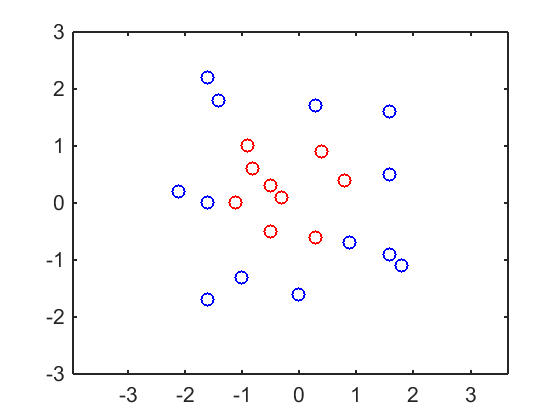

In [1]:
x_c1 = [-1.1 -0.3 -0.9 0.8 0.4  0.3 -0.5 -0.8 -0.5;
         0    0.1  1   0.4 0.9 -0.6  0.3  0.6 -0.5];

x_c2 = [-1  -1.6  0.9 1.6  1.8 1.6 -1.6 -1.4  1.6  0   0.3 -1.6 -2.1;
        -1.3 2.2 -0.7 0.5 -1.1 1.6 -1.7  1.8 -0.9 -1.6 1.7  0    0.2];      

plot(x_c1(1,:),x_c1(2,:),'ro',x_c2(1,:),x_c2(2,:),'bo')
axis([-3 3 -3 3]), axis equal

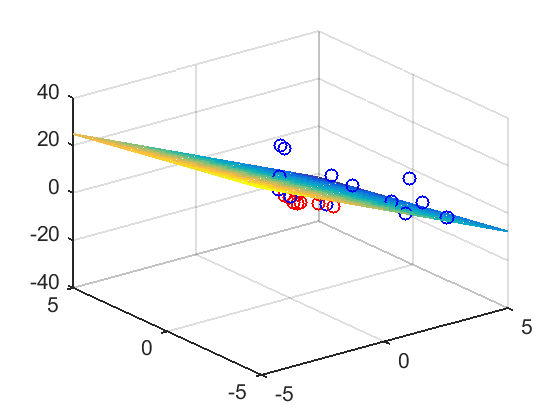

In [11]:
%%
c1n = size(x_c1,2);
c2n = size(x_c2,2);

x = [x_c1 x_c2];
y = [ones(1,c1n) -ones(1,c2n)];

z = [x(1,:).^2; sqrt(2)*x(1,:).*x(2,:);  x(2,:).^2];

n = 3;
m = c1n + c2n;
g = 1;

cvx_begin quiet    
    variables w(n,1) w0 d(m,1)    
    minimize (norm(w,2) + g*(ones(1,m)*d))
    subject to 
        y'.*(z'*w + w0) >= 1 - d;       
        d >= 0;        
cvx_end

%%
[X1,X2] = meshgrid(-5:1:5,-5:1:5);
hyper = (-w(1)*X1 - w(2)*X2 - w0)./x(3);

plot3(z(1,1:c1n),z(2,1:c1n),z(3,1:c1n),'ro',...
     z(1,c1n+1:end),z(2,c1n+1:end),z(3,c1n+1:end),'bo'), hold on
mesh(X1,X2,hyper), hold off
grid on

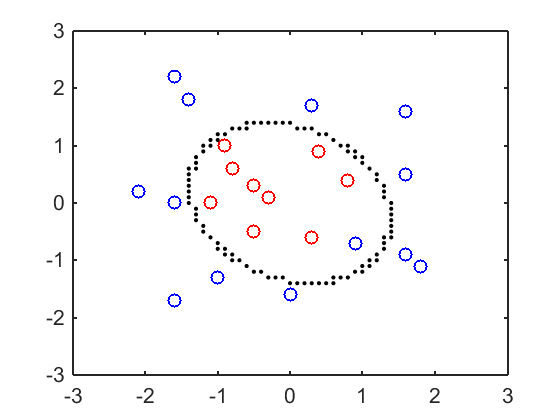

In [8]:
%%
[Xg, Yg] = meshgrid(-3:0.1:3,-3:0.1:3);
x_test = [Xg(:) Yg(:)]';
z_test = [x_test(1,:).^2; sqrt(2)*x_test(1,:).*x_test(2,:);  x_test(2,:).^2];

y_hat = z_test'*w + w0;

B = [];
for i = 1:length(y_hat)
    if abs(y_hat(i)) < 0.2
        B = [B x_test(:,i)];         
    end    
end

plot(x_c1(1,:),x_c1(2,:),'ro',x_c2(1,:),x_c2(2,:),'bo'), hold on
plot(B(1,:),B(2,:),'k.'),   hold off
axis([-3 3 -3 3])

## Feature mapping (optional)

- slide
- video lecture
- IIT or CMU




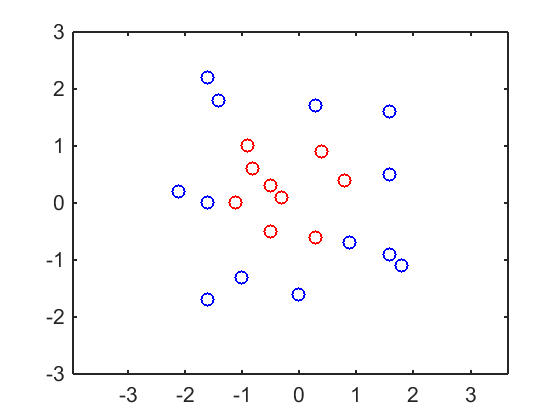

In [33]:
x_c1 = [-1.1  0;
        -0.3  0.1;
        -0.9  1;
         0.8  0.4;
         0.4  0.9;
         0.3 -0.6;
        -0.5  0.3;
        -0.8  0.6
        -0.5 -0.5];
     
x_c2 = [-1   -1.3;
        -1.6  2.2;
         0.9 -0.7;
         1.6  0.5;
         1.8 -1.1;
         1.6  1.6;
        -1.6 -1.7;
        -1.4  1.8;
         1.6 -0.9;
         0   -1.6;
         0.3  1.7;
        -1.6  0;
        -2.1  0.2;];

plot(x_c1(:,1),x_c1(:,2),'ro',x_c2(:,1),x_c2(:,2),'bo')
axis([-3 3 -3 3]), axis equal

## Polynomial function

In [34]:
c1n = size(x_c1,1);
c2n = size(x_c2,1);
m = c1n + c2n;

X = [x_c1; x_c2];
y = [ones(c1n,1); -ones(c2n,1)];

d = 3;
K = (1 + X*X').^d;

g = 1;            % gamma

cvx_begin quiet
    variables alp(m,1) u(m,1)
    minimize 1/2*sum(alp'*K*alp) + g*(sum(u))
    subject to 
        y.*(K*alp) >= 1 - u;
        u >= 0;
cvx_end

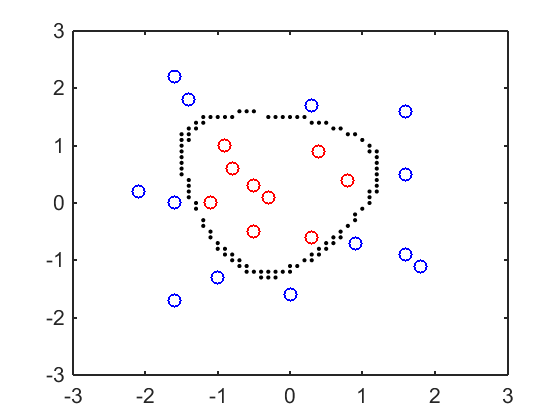

In [35]:
[Xg,Yg] = meshgrid(-2:0.1:2,-2:0.1:2);
x_test = [Xg(:) Yg(:)];

k_test = (1 + x_test*X').^d;
y_hat = k_test*alp;

B = [];
for i = 1:length(y_hat)
    if abs(y_hat(i)) < 0.15
        B = [B; x_test(i,:)];         
    end    
end

plot(x_c1(:,1),x_c1(:,2),'ro',x_c2(:,1),x_c2(:,2),'bo'), hold on
plot(B(:,1),B(:,2),'k.'),   hold off
axis([-3 3 -3 3])

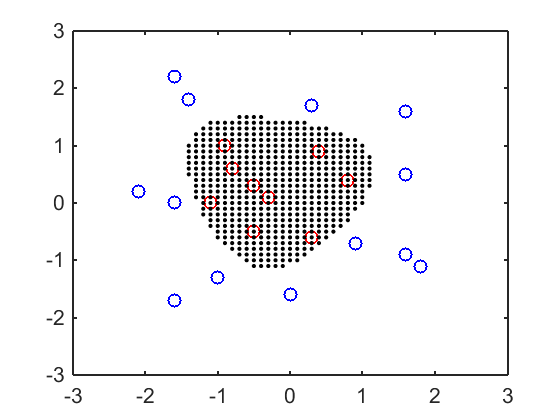

In [36]:
B = [];
for i = 1:length(y_hat)
    if y_hat(i) > 0.15
        B = [B; x_test(i,:)];         
    end    
end

plot(x_c1(:,1),x_c1(:,2),'ro',x_c2(:,1),x_c2(:,2),'bo'), hold on
plot(B(:,1),B(:,2),'k.'),   hold off
axis([-3 3 -3 3])

## RBF function

In [37]:
c1n = size(x_c1,1);
c2n = size(x_c2,1);
m = c1n + c2n;

X = [x_c1; x_c2];
y = [ones(c1n,1); -ones(c2n,1)];

sig = 0.5;
K = exp(-sqdist(X',X')/(2*sig^2));

g = 1;            % gamma

cvx_begin quiet
    variables alp(m,1) u(m,1)
    minimize 1/2*sum(alp'*K*alp) + g*(sum(u))
    subject to 
        y.*(K*alp) >= 1 - u;
        u >= 0;
cvx_end

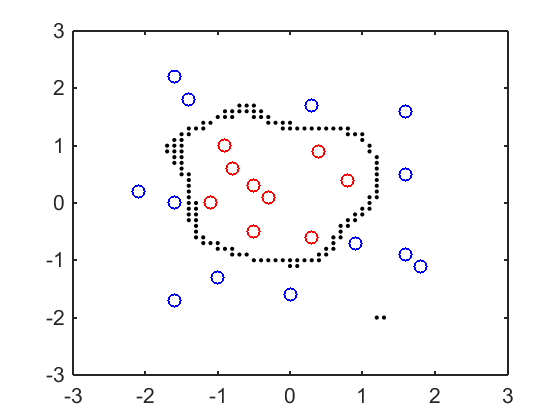

In [38]:
[Xg,Yg] = meshgrid(-2:0.1:2,-2:0.1:2);
x_test = [Xg(:) Yg(:)];

k_test = exp(-sqdist(x_test',X')/(2*sig^2));
y_hat = k_test*alp;

B = [];
for i = 1:length(y_hat)
    if abs(y_hat(i)) < 0.15
        B = [B; x_test(i,:)];         
    end    
end

plot(x_c1(:,1),x_c1(:,2),'ro',x_c2(:,1),x_c2(:,2),'bo'), hold on
plot(B(:,1),B(:,2),'k.'),   hold off
axis([-3 3 -3 3])

# 5. Shortcut of SVM

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>